In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

# Define the column names as per the dataset's description
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, names=column_names)

# Display the first few rows of the DataFrame
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
def summary_stats(df):
    summary = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values
    })
    
    shape_info = f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns"
    
    desc = df.describe().transpose()

    
    print("\n" + "="*100)
    print(shape_info)
    print("="*100)
    
    print("\nSummary Statistics:\n")
    print(summary.to_string(index=False))
    print("="*100)

    print("\nDescriptive Statistics:\n")
    print(desc.to_string())
    print("="*100)
    
    for i in df.columns:
        print("\nUnique values for", i, "column:\n")
        print(df[i].unique())

In [4]:
summary_stats(df)


Dataset Shape: 1728 rows × 7 columns

Summary Statistics:

Column Name Data Type  Missing Values  Unique Values
     buying    object               0              4
      maint    object               0              4
      doors    object               0              4
    persons    object               0              3
   lug_boot    object               0              3
     safety    object               0              3
      class    object               0              4

Descriptive Statistics:

         count unique    top  freq
buying    1728      4  vhigh   432
maint     1728      4  vhigh   432
doors     1728      4      2   432
persons   1728      3      2   576
lug_boot  1728      3  small   576
safety    1728      3    low   576
class     1728      4  unacc  1210

Unique values for buying column:

['vhigh' 'high' 'med' 'low']

Unique values for maint column:

['vhigh' 'high' 'med' 'low']

Unique values for doors column:

['2' '3' '4' '5more']

Unique values for persons 

In [5]:
# Separate features (X) and target variable (y)

X = df.drop(columns=['class']) 
y = df['class']  
print("Unique class labels:", y.unique())

Unique class labels: ['unacc' 'acc' 'vgood' 'good']


### CATEGORICAL VARIABLE APPROACH

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve

)

In [7]:
# one-hot encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
print("Encoded Features Sample:")
X_encoded_df.head()

Encoded Features Sample:


,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1382, 21)
Testing set size: (346, 21)


In [9]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Define models with hyperparameters
model_params = {
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": {'var_smoothing': np.logspace(-9, 0, 10)},
        "use_scaled": False  
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(),
        "params": {'max_depth': [3, 5, 10, None],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 5],
                   'criterion': ['gini', 'entropy', 'log_loss']},
        "use_scaled": False
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=5000),
        "params": {'C': [0.01, 0.1, 1, 10], 
                   'solver': ['lbfgs', 'liblinear'],
                   'penalty': [ 'l2', 'elasticnet', None]},
        "use_scaled": True
    },
    "SVM": {
        "model": SVC(),
        "params": {'C': [0.01, 0.1, 1, 10, 100],
                   'kernel': ['linear', 'rbf'],
                   'degree': [2, 3, 4],
                   'gamma': [ 'auto', 0.01, 0.1, 1],
                   'shrinking': [True, False]},
        "use_scaled": True
    },
    "kNN": {
        "model": KNeighborsClassifier(),
        "params": {'n_neighbors': [3, 5, 7, 9, 11],
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan', 'minkowski']},
        "use_scaled": True
    }
}


 Tuning NaiveBayes...
 Best Model for NaiveBayes -> Mean Accuracy: 0.8562 ± 0.0173

 Tuning DecisionTree...
 Best Model for DecisionTree -> Mean Accuracy: 0.9526 ± 0.0239

 Tuning LogisticRegression...
 Best Model for LogisticRegression -> Mean Accuracy: 0.8500 ± 0.0213

 Tuning SVM...
 Best Model for SVM -> Mean Accuracy: 0.9862 ± 0.0153

 Tuning kNN...
 Best Model for kNN -> Mean Accuracy: 0.6302 ± 0.0670

 Nested CV Results with Best Parameters:

                   Mean Accuracy Std Accuracy
NaiveBayes              0.856163     0.017271
DecisionTree            0.952576      0.02385
LogisticRegression      0.850021     0.021272
SVM                     0.986157     0.015267
kNN                      0.63018     0.067015
 NaiveBayes Best Parameters: {'var_smoothing': 0.1}
 DecisionTree Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
 LogisticRegression Best Parameters: {'C': 0.01, 'penalty': None, 'solver': 'lbfgs'}
 SVM Best 

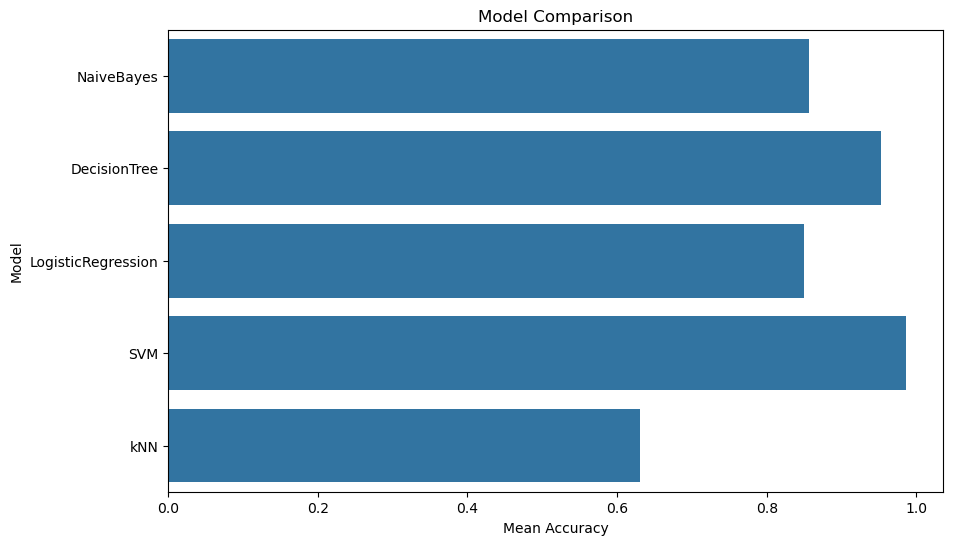

In [ ]:
# Outer CV for unbiased model selection
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = {}

for name, mp in model_params.items():
    print(f"\n Tuning {name}...")

    model = mp["model"]
    param_grid = mp["params"]
    use_scaled = mp["use_scaled"]

    X_train_used = X_train_scaled if use_scaled else X_train 
    # Inner CV for hyperparameter tuning
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='balanced_accuracy', n_jobs=-1, return_train_score=True)

    # Performing Nested CV
    nested_scores = cross_val_score(grid_search, X_train_used, y_train, cv=outer_cv, scoring='balanced_accuracy', n_jobs=-1)
    
    grid_search.fit(X_train_used, y_train)

    nested_cv_results[name] = {
        "Mean Accuracy": nested_scores.mean(),
        "Std Accuracy": nested_scores.std(),
        "Best Parameters": grid_search.best_params_
    }

    print(f" Best Model for {name} -> Mean Accuracy: {nested_scores.mean():.4f} ± {nested_scores.std():.4f}")

# Convert results to DataFrame
nested_results_df = pd.DataFrame(nested_cv_results).T

print("\n Nested CV Results with Best Parameters:\n")
print(nested_results_df[['Mean Accuracy', 'Std Accuracy']])
print("=" * 100)

for model_name in nested_results_df.index:
    print(f" {model_name} Best Parameters: {nested_results_df.loc[model_name, 'Best Parameters']}")

print("=" * 100)

# Model Comparison Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=nested_results_df, x='Mean Accuracy', y=nested_results_df.index)
plt.xlabel('Mean Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()
plt.show()

In [12]:

def evaluate_multiclass_model(model, X_train, y_train, X_test, y_test, cv=5):
    """
    Evaluates a classification model on the Car Evaluation dataset by:
    - Training on `X_train`
    - Predicting on `X_test`
    - Computing classification metrics (Accuracy, Precision, Recall, F1)
    - Performing cross-validation (if `cv > 1`)
    - Plotting a Learning Curve
    - Generating a Confusion Matrix
    """
    # --- Train Model ---
    model.fit(X_train, y_train)

    # --- Predict on Test Set ---
    y_pred = model.predict(X_test)

    # --- Compute Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1) 
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # --- Print Classification Report ---
    print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    
    # --- Print Individual Metrics ---
    print("\n Test Set Evaluation:")
    print(f" Accuracy: {accuracy:.2f}")
    print(f" Precision (Weighted): {precision:.2f}")
    print(f" Recall (Weighted): {recall:.2f}")
    print(f" F1 Score (Weighted): {f1:.2f}")

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.show()

    # --- Learning Curve Analysis ---
    if cv > 1:
        stratified_cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_cv, scoring='accuracy'
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

        plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s', linestyle='--', color='red')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

        plt.xlabel("Training Set Size")
        plt.ylabel("Accuracy")
        plt.title(f"Learning Curve: {model.__class__.__name__}")
        plt.legend()
        plt.grid()
        plt.show()



 Classification Report:
               precision    recall  f1-score   support

         acc       0.99      1.00      0.99        77
        good       1.00      0.93      0.96        14
       unacc       1.00      1.00      1.00       242
       vgood       1.00      1.00      1.00        13

    accuracy                           1.00       346
   macro avg       1.00      0.98      0.99       346
weighted avg       1.00      1.00      1.00       346


 Test Set Evaluation:
 Accuracy: 1.00
 Precision (Weighted): 1.00
 Recall (Weighted): 1.00
 F1 Score (Weighted): 1.00


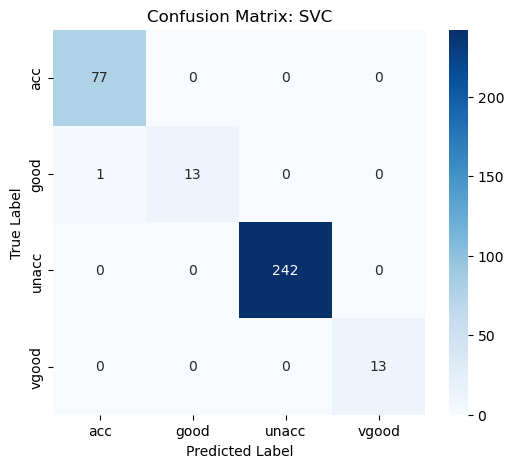

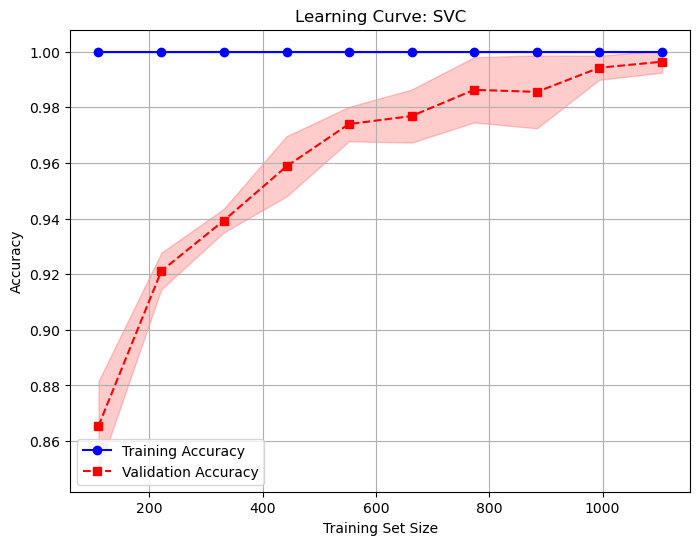

In [13]:
############### SVM ################ SVM Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}

svm = SVC(C=10, degree=2, gamma='auto', kernel='rbf', shrinking=True, probability=True)
evaluate_multiclass_model(svm, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

         acc       0.89      0.86      0.87        77
        good       0.82      1.00      0.90        14
       unacc       0.97      0.97      0.97       242
       vgood       0.86      0.92      0.89        13

    accuracy                           0.94       346
   macro avg       0.89      0.94      0.91       346
weighted avg       0.94      0.94      0.94       346


 Test Set Evaluation:
 Accuracy: 0.94
 Precision (Weighted): 0.94
 Recall (Weighted): 0.94
 F1 Score (Weighted): 0.94


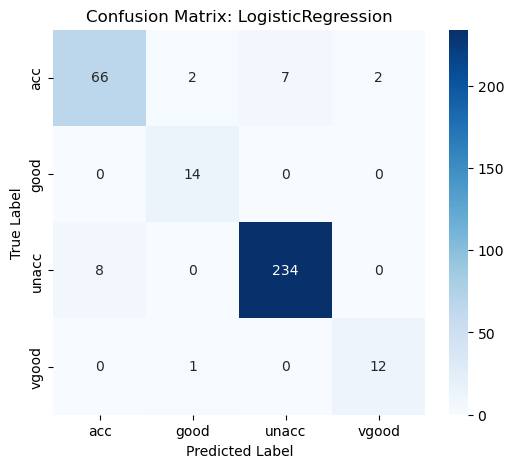

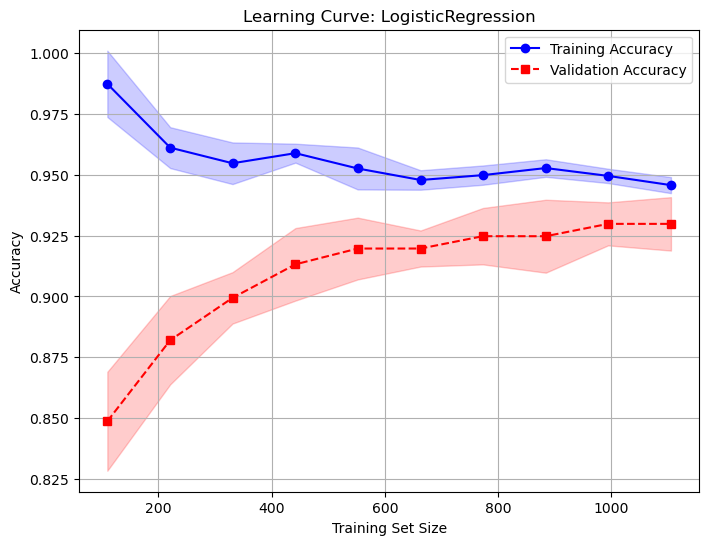

In [14]:
################ LogisticRegression ################   LogisticRegression Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

logreg = LogisticRegression(C=10, penalty='l2', solver='lbfgs')
evaluate_multiclass_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

         acc       0.95      0.96      0.95        77
        good       0.93      1.00      0.97        14
       unacc       1.00      0.99      0.99       242
       vgood       0.92      0.85      0.88        13

    accuracy                           0.98       346
   macro avg       0.95      0.95      0.95       346
weighted avg       0.98      0.98      0.98       346


 Test Set Evaluation:
 Accuracy: 0.98
 Precision (Weighted): 0.98
 Recall (Weighted): 0.98
 F1 Score (Weighted): 0.98


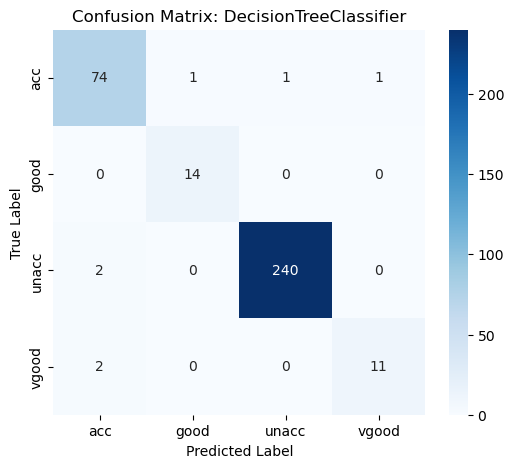

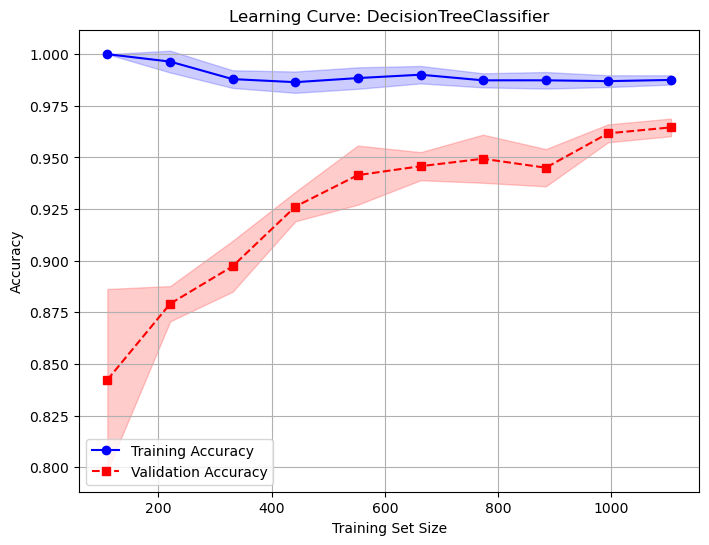

In [15]:
### DecisionTreeClassifier ####   DecisionTree Best Parameters: {'criterion': 'log_loss', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

dt = DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=1, min_samples_split=2)
evaluate_multiclass_model(dt, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

         acc       0.83      0.74      0.78        77
        good       0.60      0.43      0.50        14
       unacc       0.92      0.99      0.96       242
       vgood       1.00      0.54      0.70        13

    accuracy                           0.90       346
   macro avg       0.84      0.67      0.73       346
weighted avg       0.89      0.90      0.89       346


 Test Set Evaluation:
 Accuracy: 0.90
 Precision (Weighted): 0.89
 Recall (Weighted): 0.90
 F1 Score (Weighted): 0.89


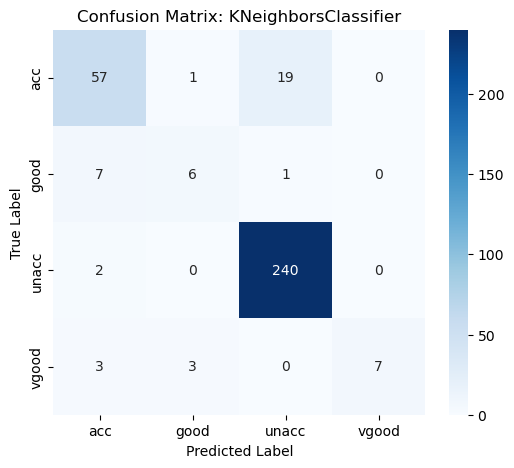

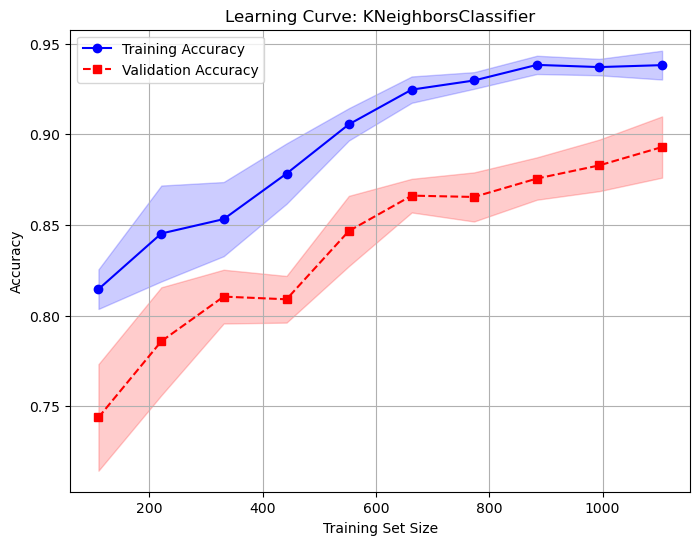

In [16]:
########## KNeighborsClassifier #########  kNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='uniform')
evaluate_multiclass_model(knn, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

         acc       0.74      0.66      0.70        77
        good       0.67      0.86      0.75        14
       unacc       0.93      0.93      0.93       242
       vgood       0.76      1.00      0.87        13

    accuracy                           0.87       346
   macro avg       0.78      0.86      0.81       346
weighted avg       0.87      0.87      0.87       346


 Test Set Evaluation:
 Accuracy: 0.87
 Precision (Weighted): 0.87
 Recall (Weighted): 0.87
 F1 Score (Weighted): 0.87


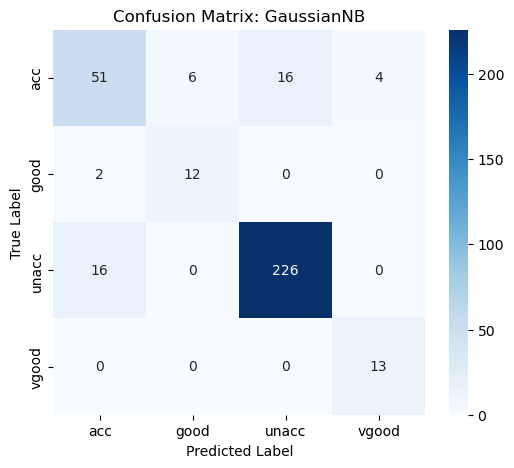

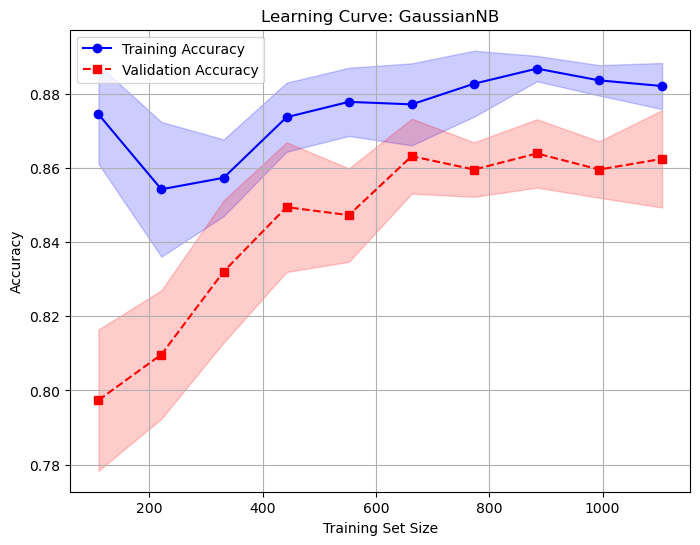

In [17]:
########## Naive Bayes ########## NaiveBayes Best Parameters: {'var_smoothing': 1.0}

nb = GaussianNB(var_smoothing=1.0)
evaluate_multiclass_model(nb, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)

### NUMERICAL VARIABLE APPROACH [ORDINAL TREATMENT]

In [18]:
# ordinal encoding for categorical features
ordinal_mappings = {
    'buying': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1},
    'maint': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1},
    'doors': {'2': 2, '3': 3, '4': 4, '5more': 5},
    'persons': {'2': 2, '4': 4, 'more': 6},
    'lug_boot': {'small': 1, 'med': 2, 'big': 3},
    'safety': {'low': 1, 'med': 2, 'high': 3},
    'class': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}  # Target variable encoding
}

df_numerical = df.replace(ordinal_mappings)
df_numerical.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


In [19]:
# Separate features and target
X_numerical = df_numerical.drop(columns=['class'])
y_numerical = df_numerical['class']

# Split into training and test sets (80% train, 20% test)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42, stratify=y_numerical)

print("Training set size:", X_train_num.shape)
print("Testing set size:", X_test_num.shape)

Training set size: (1382, 6)
Testing set size: (346, 6)


In [20]:
# Standardize numerical features
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)


Tuning NaiveBayes...
Best Model for NaiveBayes -> Mean Accuracy: 0.7046 ± 0.0214

Tuning DecisionTree...
Best Model for DecisionTree -> Mean Accuracy: 0.9343 ± 0.0340

Tuning LogisticRegression...
Best Model for LogisticRegression -> Mean Accuracy: 0.7150 ± 0.0404

Tuning SVM...
Best Model for SVM -> Mean Accuracy: 0.9690 ± 0.0169

Tuning kNN...
Best Model for kNN -> Mean Accuracy: 0.8779 ± 0.0236

Nested CV Results with Best Parameters:

                   Mean Accuracy Std Accuracy
NaiveBayes              0.704562     0.021411
DecisionTree            0.934281     0.034043
LogisticRegression      0.714977      0.04035
SVM                     0.968987       0.0169
kNN                     0.877916     0.023623
NaiveBayes Best Parameters: {'var_smoothing': 0.001}
DecisionTree Best Parameters: {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
LogisticRegression Best Parameters: {'C': 0.01, 'penalty': None, 'solver': 'lbfgs'}
SVM Best Parameters: 

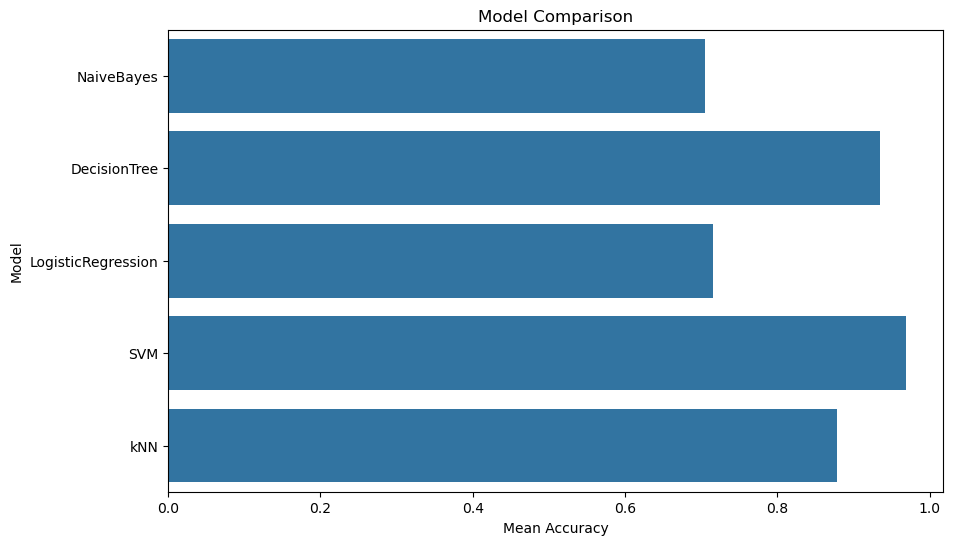

In [21]:
# Nested CV for hyperparameter tuning for numerical features

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = {}

for name, mp in model_params.items():
    print(f"\nTuning {name}...")

    model = mp["model"]
    param_grid = mp["params"]
    use_scaled = mp["use_scaled"]

    X_train_used = X_train_num_scaled if use_scaled else X_train_num

    # Inner CV for hyperparameter tuning
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='balanced_accuracy', n_jobs=-1, return_train_score=True)

    nested_scores = cross_val_score(grid_search, X_train_used, y_train_num, cv=outer_cv, scoring='balanced_accuracy', n_jobs=-1)
    
    grid_search.fit(X_train_used, y_train_num)

    nested_cv_results[name] = {
        "Mean Accuracy": nested_scores.mean(),
        "Std Accuracy": nested_scores.std(),
        "Best Parameters": grid_search.best_params_
    }

    print(f"Best Model for {name} -> Mean Accuracy: {nested_scores.mean():.4f} ± {nested_scores.std():.4f}")

nested_results_df = pd.DataFrame(nested_cv_results).T

print("\nNested CV Results with Best Parameters:\n")
print(nested_results_df[['Mean Accuracy', 'Std Accuracy']])
print("=" * 100)

for model_name in nested_results_df.index:
    print(f"{model_name} Best Parameters: {nested_results_df.loc[model_name, 'Best Parameters']}")

print("=" * 100)

# Model Comparison Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=nested_results_df, x='Mean Accuracy', y=nested_results_df.index)
plt.xlabel('Mean Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()
plt.show()



 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       242
           1       1.00      0.97      0.99        77
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13

    accuracy                           0.99       346
   macro avg       1.00      0.99      1.00       346
weighted avg       0.99      0.99      0.99       346


 Test Set Evaluation:
 Accuracy: 0.99
 Precision (Weighted): 0.99
 Recall (Weighted): 0.99
 F1 Score (Weighted): 0.99


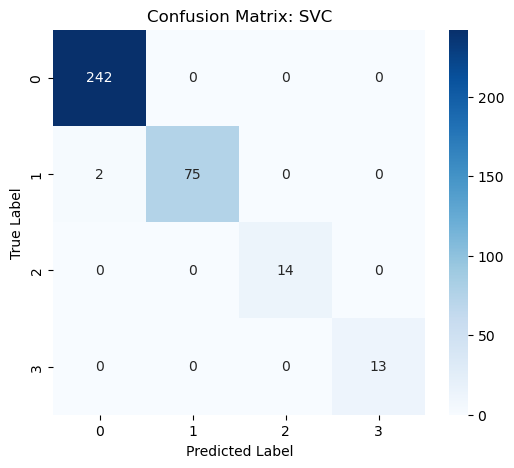

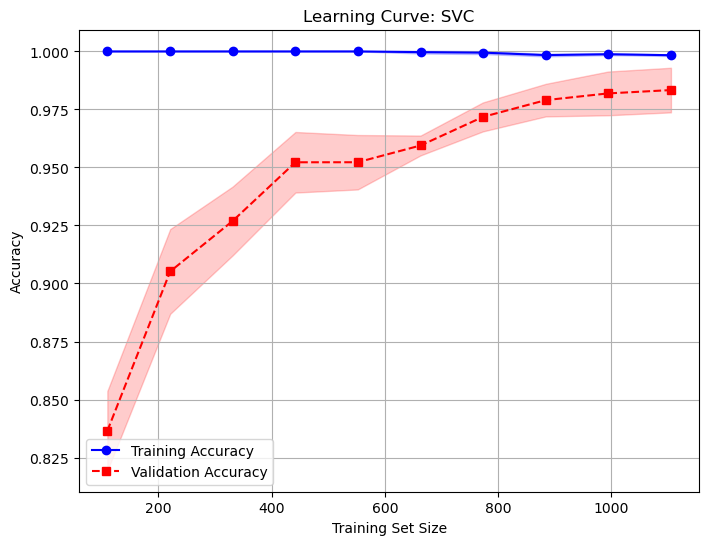

In [22]:
######## SVM with numerical features ######## SVM Best Parameters: {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf', 'shrinking': True}

svm = SVC(C=100, degree=2, gamma=0.1, kernel='rbf', shrinking=True, probability=True)
evaluate_multiclass_model(svm, X_train_num_scaled, y_train_num, X_test_num_scaled, y_test_num, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       242
           1       0.60      0.52      0.56        77
           2       0.50      0.29      0.36        14
           3       0.57      0.62      0.59        13

    accuracy                           0.79       346
   macro avg       0.63      0.59      0.60       346
weighted avg       0.78      0.79      0.79       346


 Test Set Evaluation:
 Accuracy: 0.79
 Precision (Weighted): 0.78
 Recall (Weighted): 0.79
 F1 Score (Weighted): 0.79


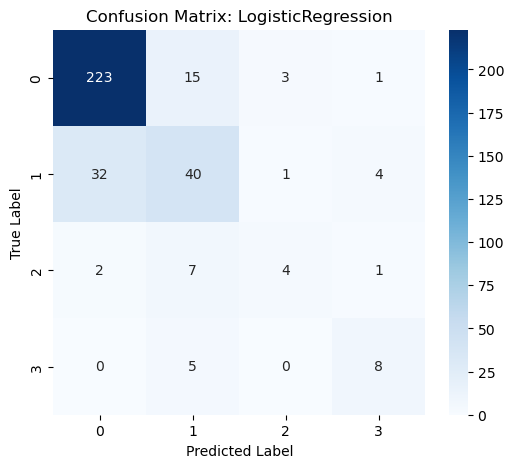

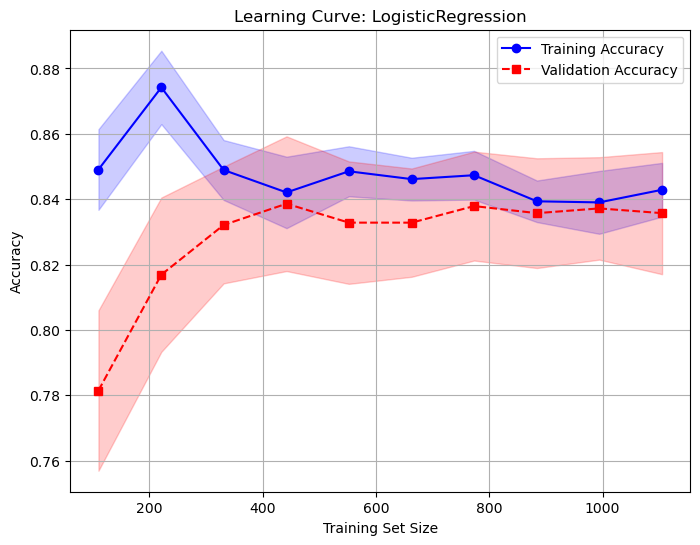

In [23]:
######## LogisticRegression with numerical features ######## LogisticRegression Best Parameters: {'C': 0.01, 'penalty': None, 'solver': 'lbfgs'}

logreg = LogisticRegression(C=0.01, penalty=None, solver='lbfgs')
evaluate_multiclass_model(logreg, X_train_num_scaled, y_train_num, X_test_num_scaled, y_test_num, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.95      0.95      0.95        77
           2       0.92      0.86      0.89        14
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.96      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346


 Test Set Evaluation:
 Accuracy: 0.98
 Precision (Weighted): 0.98
 Recall (Weighted): 0.98
 F1 Score (Weighted): 0.98


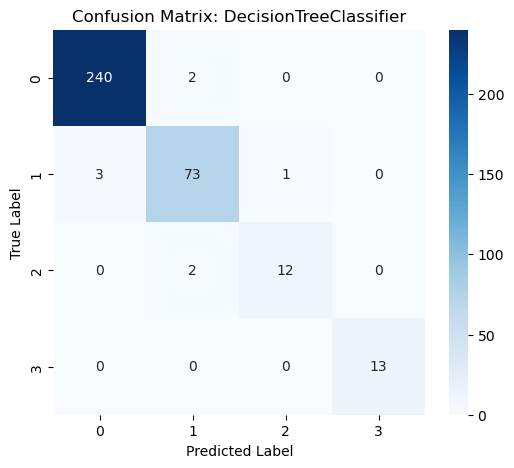

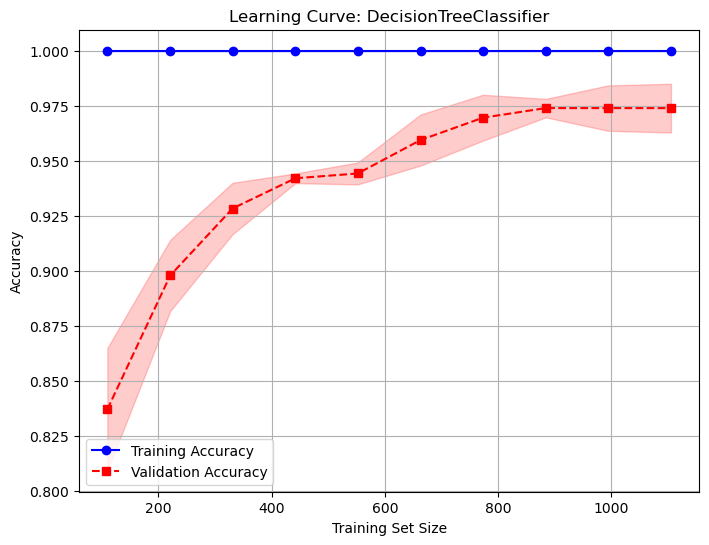

In [24]:
### DecisionTreeClassifier with numerical features ### DecisionTree Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2)
evaluate_multiclass_model(dt, X_train_num, y_train_num, X_test_num, y_test_num, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.87      0.96      0.91        77
           2       1.00      0.57      0.73        14
           3       0.90      0.69      0.78        13

    accuracy                           0.96       346
   macro avg       0.94      0.80      0.85       346
weighted avg       0.96      0.96      0.95       346


 Test Set Evaluation:
 Accuracy: 0.96
 Precision (Weighted): 0.96
 Recall (Weighted): 0.96
 F1 Score (Weighted): 0.95


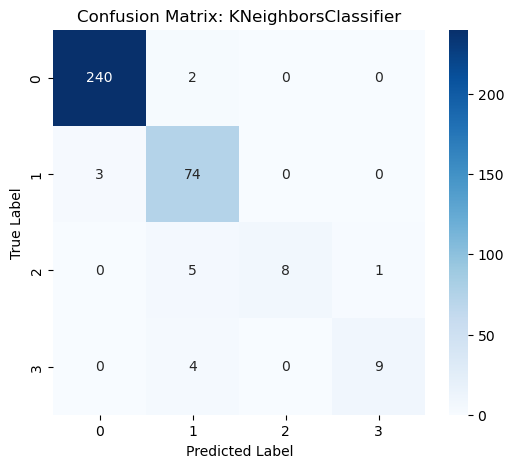

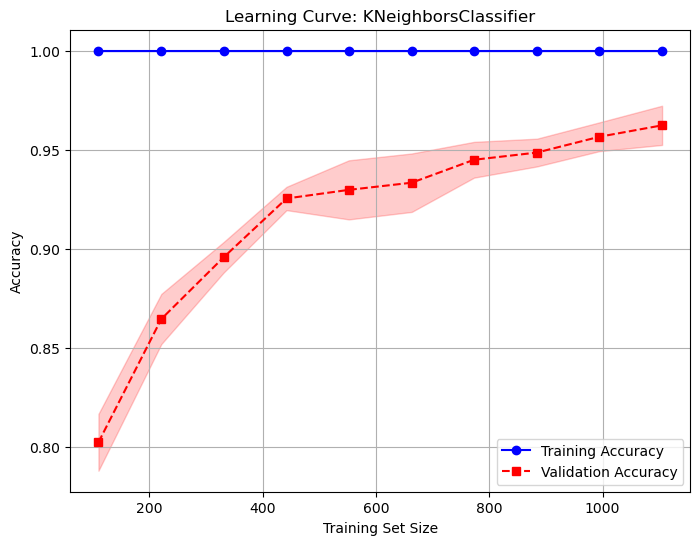

In [25]:
######## KNeighborsClassifier with numerical features ######## KNN Best Parameters:{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
evaluate_multiclass_model(knn, X_train_num_scaled, y_train_num, X_test_num_scaled, y_test_num, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       242
           1       0.69      0.40      0.51        77
           2       0.43      0.21      0.29        14
           3       0.62      1.00      0.76        13

    accuracy                           0.81       346
   macro avg       0.65      0.64      0.61       346
weighted avg       0.79      0.81      0.78       346


 Test Set Evaluation:
 Accuracy: 0.81
 Precision (Weighted): 0.79
 Recall (Weighted): 0.81
 F1 Score (Weighted): 0.78


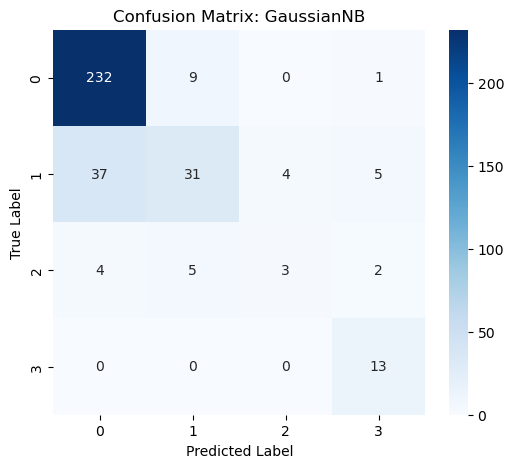

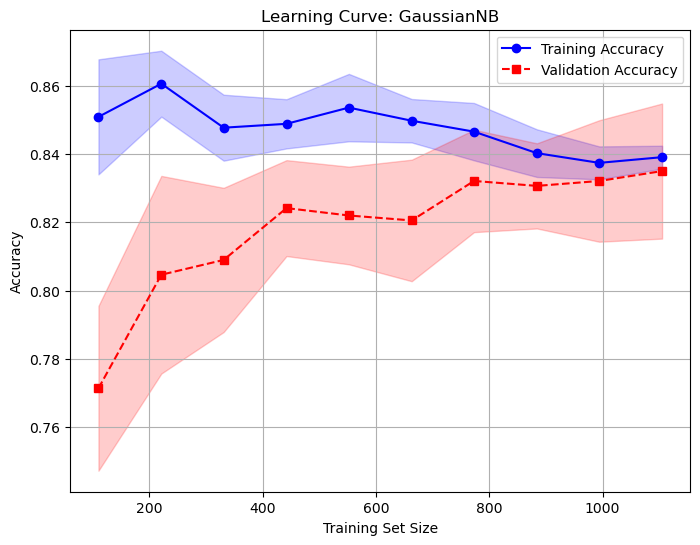

In [26]:
#### NaiveBayes with numerical features #### NaiveBayes Best Parameters: {'var_smoothing': 0.01}

nb = GaussianNB(var_smoothing=0.01)
evaluate_multiclass_model(nb, X_train_num_scaled, y_train_num, X_test_num_scaled, y_test_num, cv=5)